# Content Based Recommendation: Cosmetics

In [116]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.metrics.pairwise import linear_kernel


In [48]:
# Load the data
cosmetics = pd.read_csv('datasets/cosmetics.csv')

In [49]:
cosmetics.head(5)

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1


In [50]:
# Counts of product types
cosmetics.Label.value_counts()

Moisturizer    298
Cleanser       281
Face Mask      266
Treatment      248
Eye cream      209
Sun protect    170
Name: Label, dtype: int64

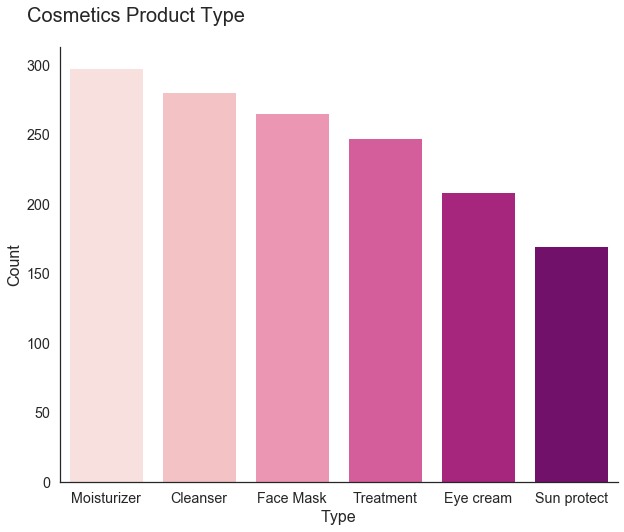

In [71]:
plt.rcParams['figure.figsize'] = [10,8]
sns.set(font_scale = 1.3)
sns.set_style("white")
sns.countplot(x=cosmetics['Label'],data=cosmetics, palette="RdPu", 
               order=cosmetics['Label'].value_counts().index)

plt.suptitle("Cosmetics Product Type", 
             size=20, x=0.08, y=.95,horizontalalignment='left', verticalalignment='top')

plt.ylabel('Count', size=16)
plt.xlabel('Type', size=16)

sns.despine()

plt.show()

No handles with labels found to put in legend.


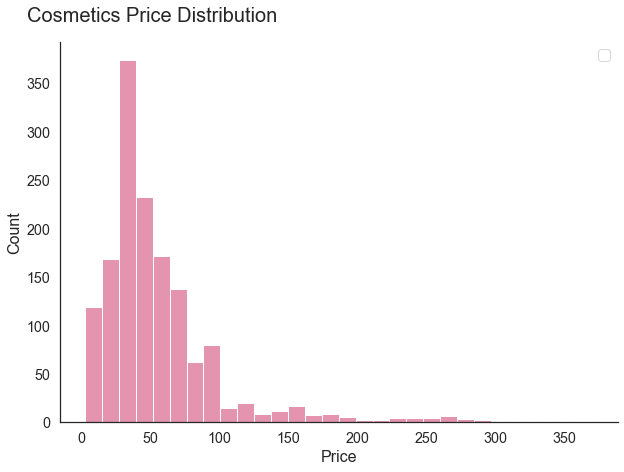

In [72]:
plt.rcParams['figure.figsize'] = [10,7]
fig, ax = plt.subplots()

sns.histplot(data=cosmetics, x="Price", bins=30, color='palevioletred')


plt.suptitle("Cosmetics Price Distribution", 
             size=20, x=0.08, y=.95,horizontalalignment='left', verticalalignment='top')

plt.ylabel('Count', size=16)
plt.xlabel('Price', size=16)

plt.legend(fontsize=15)

right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)

plt.show()

No handles with labels found to put in legend.


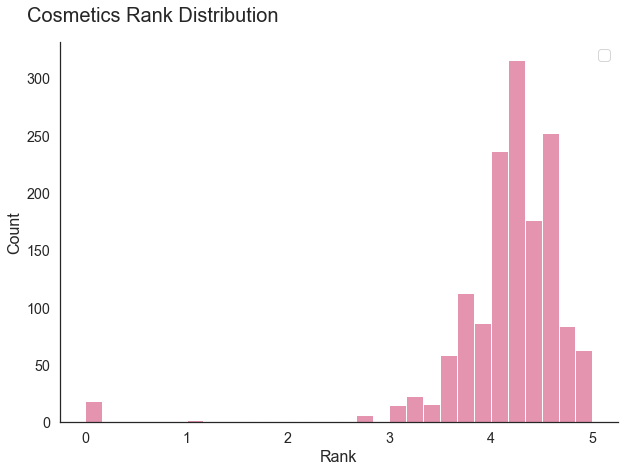

In [77]:
plt.rcParams['figure.figsize'] = [10,7]
fig, ax = plt.subplots()

sns.histplot(data=cosmetics, x="Rank", bins=30, color='palevioletred')


plt.suptitle("Cosmetics Rank Distribution", 
             size=20, x=0.08, y=.95,horizontalalignment='left', verticalalignment='top')

plt.ylabel('Count', size=16)
plt.xlabel('Rank', size=16)

plt.legend(fontsize=15)

right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)

plt.show()

In [58]:
# Initialize dictionary, list, and initial index
ingredient_idx = {}
corpus = []
idx = 0 

# For loop for tokenization 
for i in range(len(cosmetics)):    
    ingredients = cosmetics['Ingredients'][i]
    ingredients_lower = ingredients.lower()
    tokens = ingredients_lower.split(', ')
    corpus.append(tokens)
    for ingredient in tokens:
        if ingredient not in ingredient_idx:
            ingredient_idx[ingredient] = idx
            idx += 1
            
# Check the result 
print("The index for decyl oleate is", ingredient_idx['decyl oleate'])

The index for decyl oleate is 25


In [59]:
# Get the number of items and tokens 
M = len(cosmetics)     
N = len(ingredient_idx)

# Initialize a matrix of zeros
A = np.zeros((M, N))
A.shape

(1472, 6833)

## Counter function

In [60]:
# Define the oh_encoder function
def counter(tokens):
    x = np.zeros(N)    
    for ingredient in tokens:
        # Get the index for each ingredient
        idx = ingredient_idx[ingredient]
        # Put 1 at the corresponding indices
        x[idx] = 1
    return x

### Document Term Matrix

In [65]:
# Make a document-term matrix
i = 0
for tokens in corpus:
    A[i, :] = counter(tokens)
    i += 1

### Finding Similarity

In [79]:
cosine_similarities = linear_kernel(A, A)

results = {}

for idx, row in cosmetics.iterrows():
    similar_indices = cosine_similarities[idx].argsort()[:-100:-1]
    similar_items = [(cosine_similarities[idx][i], cosmetics['Name'][i], 
                      cosmetics['Ingredients'][i], cosmetics['Price'][i], 
                      cosmetics['Rank'][i]) for i in similar_indices]

    # First item is the item itself, so remove it.
    results[row['Name']] = similar_items[1:]

In [114]:
def plots(plot_df):
    # set figure size
    plt.rcParams['figure.figsize'] = (5,2)
    
    plt.title("Top Product Recommendation based on Score")
    sns.barplot(x =plot_df['score'],  y= plot_df['name'], data = plot_df, palette=("RdPu"))
    plt.show()
    
    plt.title("Top Product Recommendation based on Price")
    sns.barplot(x =plot_df['price'],  y= plot_df['name'], data = plot_df.sort_values('price'), palette=("RdPu"))
    plt.show()
    
    plt.title("Top Product Recommendation based on Rank")
    sns.barplot(x =plot_df['rank'],  y= plot_df['name'], data = plot_df, palette=("RdPu"))
    plt.show()

Recommending 5 products similar to Color Control Cushion Compact Broad Spectrum SPF 50+...
-------


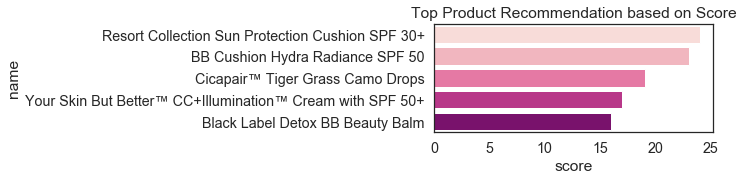

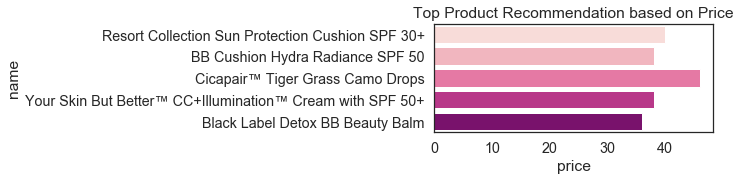

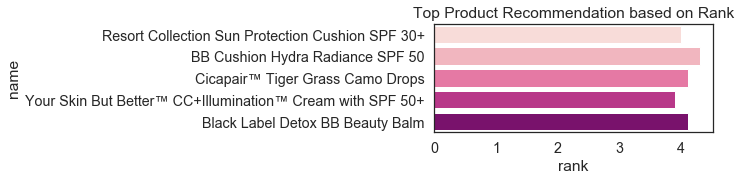

In [115]:
# Just reads the results out of the dictionary.
def recommend(name, num):
    print("Recommending " + str(num) + " products similar to " + name + "...")
    print("-------")
    recs = results[name][:num]
    product_list = []
    for rec in recs:
        r = [rec[1], rec[3], rec[4], rec[0]]
        product_list.append(r)
    
    df1 = pd.DataFrame(product_list, columns=["name", "price", "rank", "score"])
    plots(df1)

product_list = recommend("Color Control Cushion Compact Broad Spectrum SPF 50+", num=5)